In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/1987.csv')
df = df[df['Cancelled'] == 0]
df = df[df['Dest'] == 'SFO']
df['CarrierDelay'] = df.CarrierDelay.fillna(0)
df['WeatherDelay'] = df.WeatherDelay.fillna(0)
df['NASDelay'] = df.CarrierDelay.fillna(0)
df['SecurityDelay'] = df.SecurityDelay.fillna(0)
df['LateAircraftDelay'] =df.LateAircraftDelay.fillna(0)
df['Late'] = ((df.CRSArrTime - df.ArrTime) > 30).astype(int)
df = df.drop(['Cancelled', 'Year', 'FlightNum', 
              'CancellationCode', 'TaxiIn', 'TaxiOut', 
              'AirTime', 'TailNum', 'ActualElapsedTime',
             'ArrDelay', 'ArrTime'], axis=1)

In [5]:
df.shape

(34286, 19)

In [7]:
def find_num_unique_categories(df):
    categorical = df.select_dtypes(include=['object'])
    for i in categorical:
        column = categorical[i]
        print(i)
        print(column.nunique())
find_num_unique_categories(df)

UniqueCarrier
13
Origin
59
Dest
1


In [8]:
df = pd.get_dummies(df)

In [9]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [11]:
df_test.shape

(6858, 89)

In [12]:
X_train = df_train.loc[:, ~(df_train.columns).isin(['Late'])]
Y_train = df_train.Late
X_test = df_test.loc[:, ~(df_test.columns).isin(['Late'])]
Y_test = df_test.Late

In [13]:
ridgec = linear_model.RidgeClassifier()
ridgec.fit(X_train, Y_train)
Y_pred_ridge = ridgec.predict(X_test)
accuracy_score(Y_test, Y_pred_ridge)

0.96369203849518814

In [16]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_GBC_pred = gbc.predict(X_test)
accuracy_score(Y_test, Y_GBC_pred)

0.9708369787109945

0.0158102766798
0.378881987578


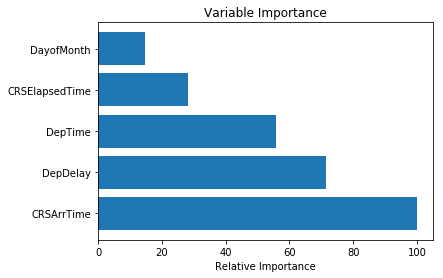

In [19]:
feature_importance = gbc.feature_importances_
import scipy
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos[0:5], feature_importance[sorted_idx][0:5], align='center')
plt.yticks(pos[0:5], X_test.columns[sorted_idx][0:5])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [21]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_RFC_Pred = rfc.predict(X_test)
accuracy_score(Y_test, Y_RFC_Pred)

0.96967045785943429

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

In [23]:
knnc = KNeighborsClassifier()
knnc.fit(X_train, Y_train)
Y_knn_Pred = knnc.predict(X_test)
accuracy_score(Y_test, Y_knn_Pred)

0.96573344998541844

In [32]:
GBCparams = {'max_depth': range(3,6), 
             'n_estimators': range(100,200,25),
            'learning_rate': [.1,.3]}
from sklearn.model_selection import GridSearchCV
GSgbc = GridSearchCV(gbc, GBCparams)

In [33]:
GSgbc.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(3, 6), 'n_estimators': range(100, 105, 5), 'learning_rate': [0.1, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
bestGBC = GSgbc.best_estimator_

In [37]:
Y_best_gbcpred = bestGBC.predict(X_test)

In [41]:
accuracy_score(Y_test,Y_best_gbcpred)

0.97142023913677455